# Compare with LazEv

In [1]:
using DSP  # for unwrap
using Interpolations
using LaTeXStrings
using Printf
using Plots, Measures
theme(:wong2)
include("../Utils/misc-tsv.jl")
include("../Utils/misc-tool.jl")

Main.MiscTool

## Phase and Amplitude

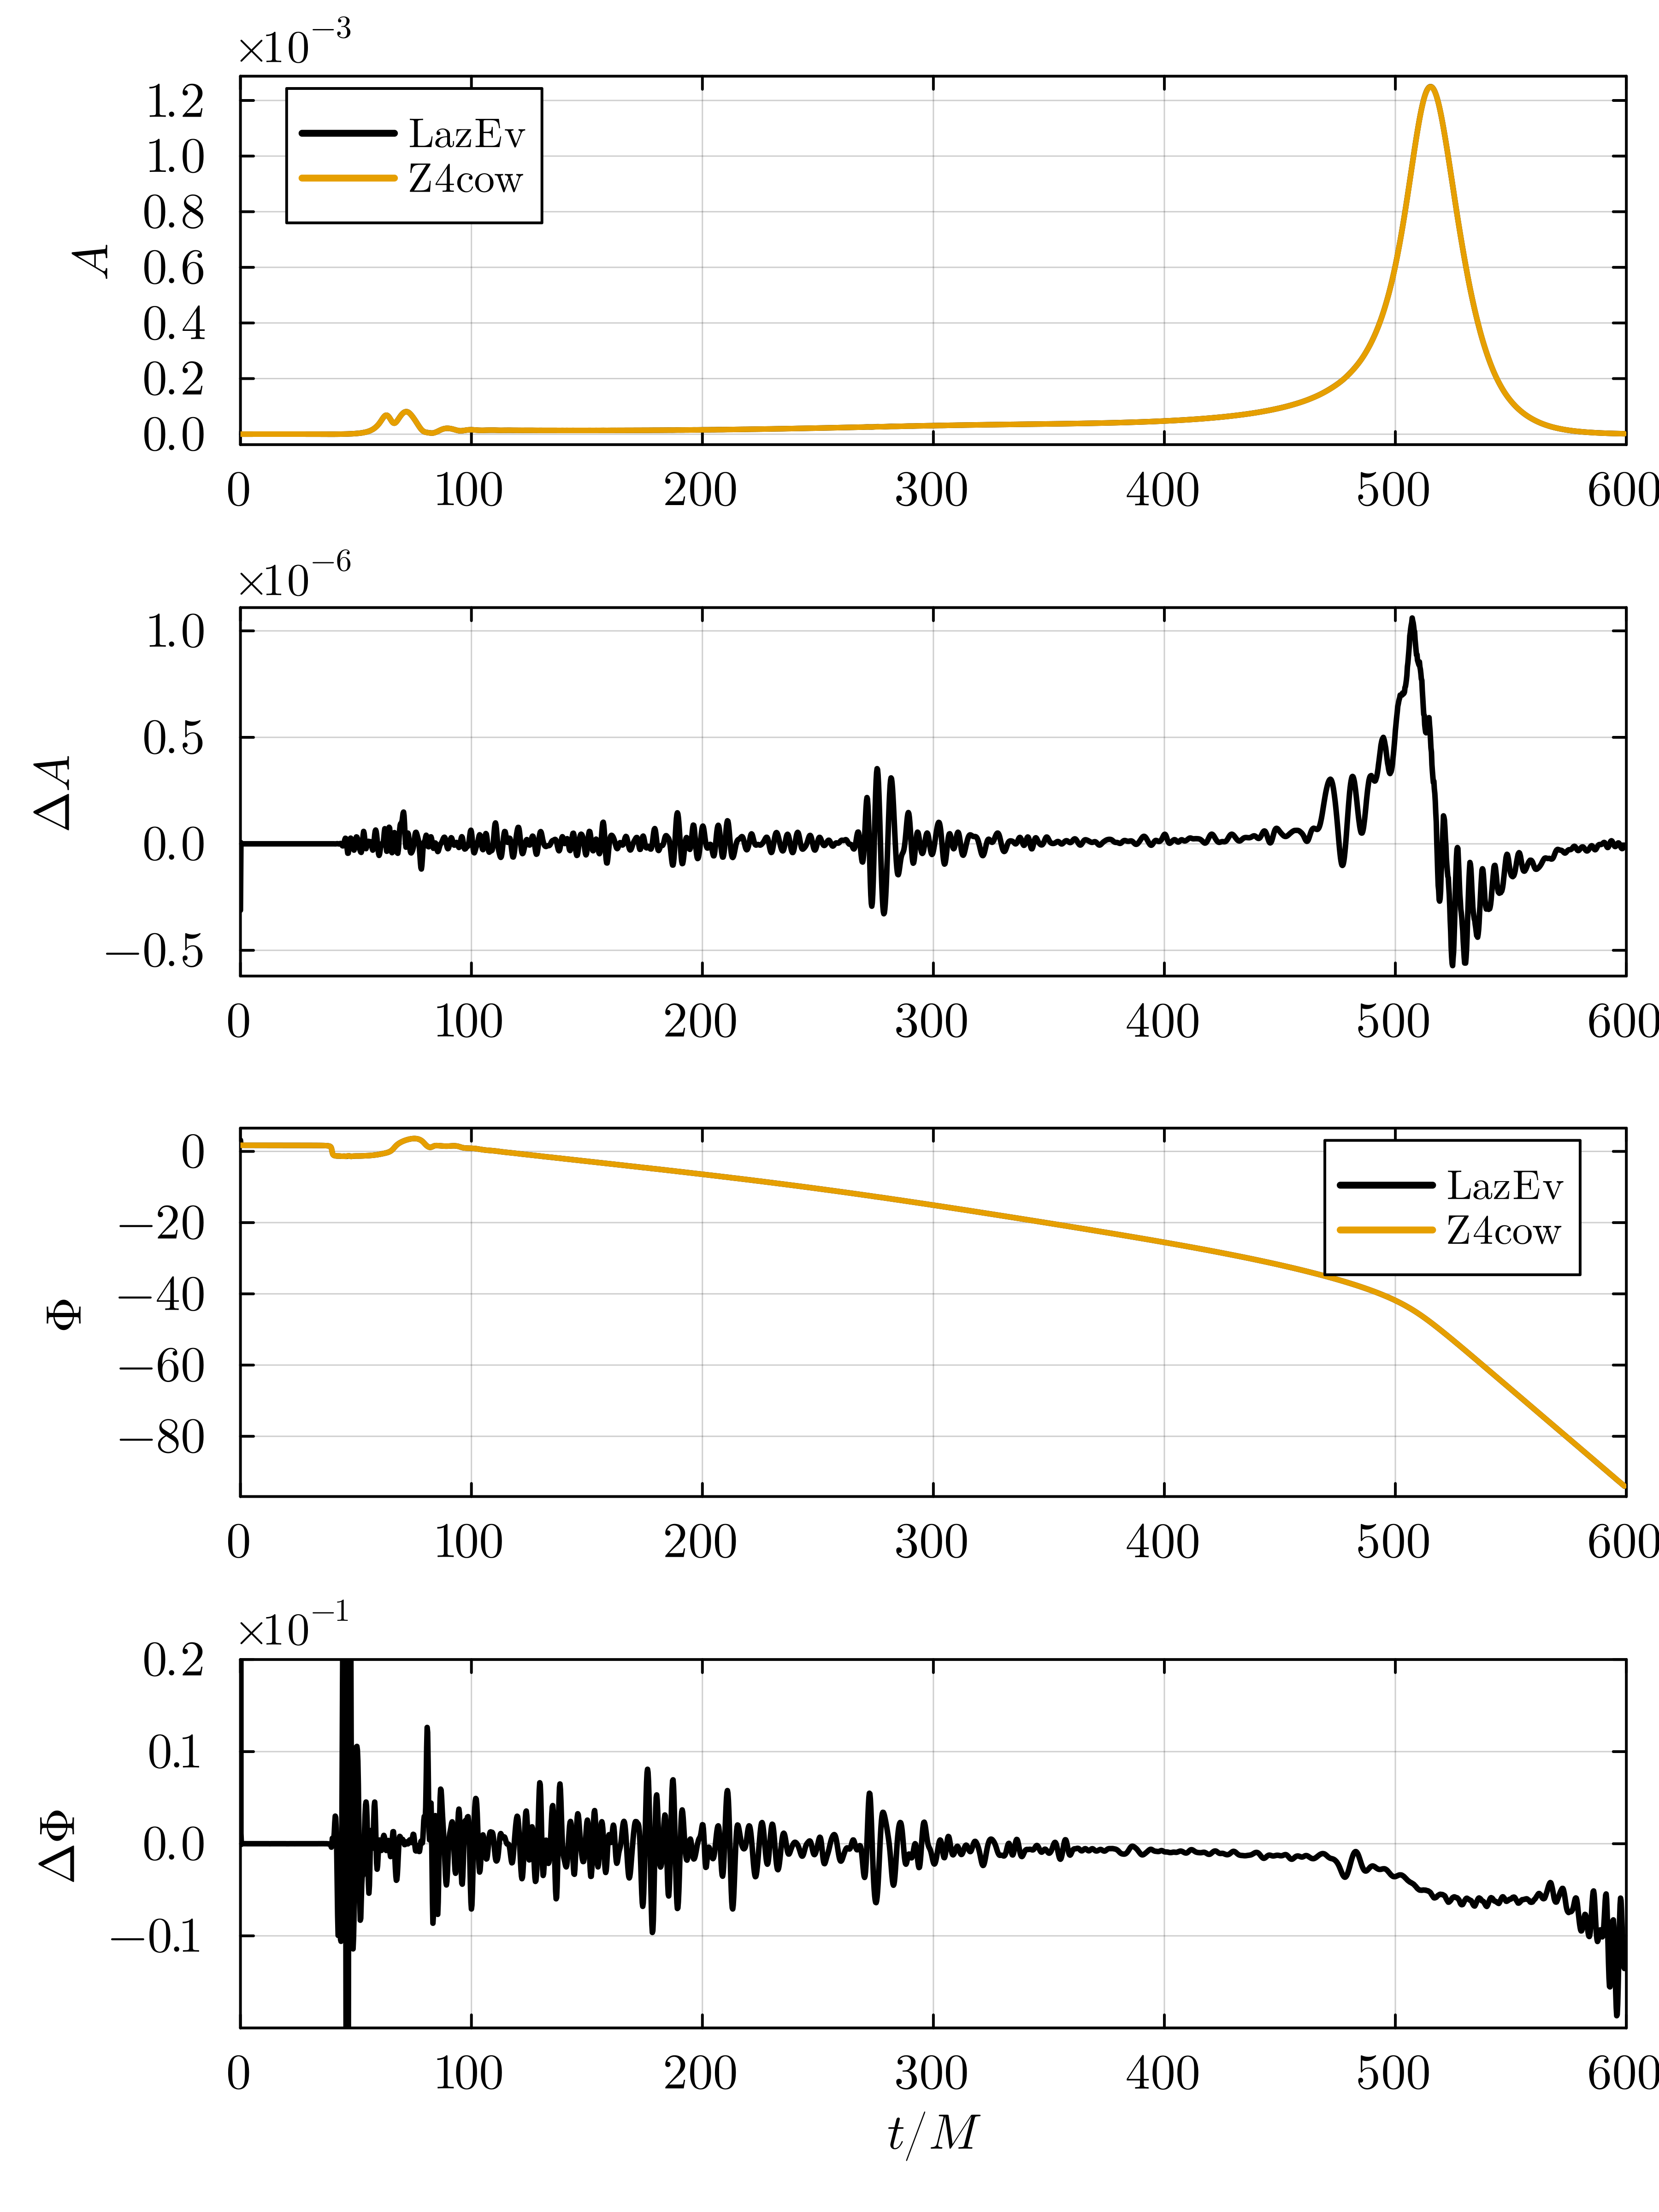

In [5]:
# Function to interpolate real and imaginary components
interp_cplx = dat -> (LinearInterpolation(dat[1], dat[2]), LinearInterpolation(dat[1], dat[3]))

# Function to compute amplitude and phase
compute_amp_phase = (real, imag) -> (
    x -> abs.(real(x) .+ imag(x) .* im), 
    x -> angle.(real(x) .+ imag(x) .* im)
)

# Load data and process
let dirsZ, dirsL, fZ_A, fL_A, fZ_phi, fL_phi
    plt_A_phi = plot()
    
    dirsL = [("LazEv-low/pk_rad_obs_1_psi4_2_2.tl", "LazEv")]
    dirsZ = [("q1-Z4cow-newInitLap-low/Sum/mp_Psi4_l2_m2_r60.00.tsv", "Z4cow")]
    
    (datsL, labsL) = MiscTSV.load_data_0d(dirsL; cols=[1, 2, 3], parent_dir="../../data/q1")
    (datsZ, labsZ) = MiscTSV.load_data_0d(dirsZ; cols=[1, 2, 3], parent_dir="../../data/q1")
    
    # Interpolate
    fL_real, fL_imag = interp_cplx(datsL[1])
    fZ_real, fZ_imag = interp_cplx(datsZ[1])
    
    # Compute amplitude and phase
    fL_A, fL_phi = compute_amp_phase(fL_real, fL_imag)
    fZ_A, fZ_phi = compute_amp_phase(fZ_real, fZ_imag)
    
    # Extract time data
    x0 = datsZ[1][1]
    
    # Plot
    p1 = plot(x0, fL_A(x0), label=L"\mathrm{LazEv}", ylabel=L"A", linewidth=2)
    xs = 0:100:600
    xticks!(p1, xs, [L"%$(n)" for n in xs])
    p1 = plot!(x0, fZ_A(x0), label=L"\mathrm{Z4cow}", linewidth=2)
    p1 = plot!(framestyle=:box,
               titlefontsize=14,
               guidefontsize=12,
               tickfontsize=12,
               legendfontsize=10)
    p1 = plot!(yaxis=(formatter=(f)->L"%$(round(f * 1e3, digits=1))"), topmargin=0.5cm)
    p1 = annotate!(0, maximum(fZ_A(x0))*1.135, Plots.text(L"\times10^{-3}", 11, :black, :left))
    
    #
    p2 = plot(x0, fL_A(x0)-fZ_A(x0), label="", ylabel=L"\Delta A", linewidth=2)
    xs = 0:100:600
    xticks!(p2, xs, [L"%$(n)" for n in xs])
    p2 = plot!(framestyle=:box,
               titlefontsize=14,
               guidefontsize=12,
               tickfontsize=12,
               legendfontsize=10)
    p2 = plot!(yaxis=(formatter=(f)->L"%$(round(f * 1e6, digits=1))"), topmargin=2mm)
    p2 = annotate!(0, maximum(fL_A(x0)-fZ_A(x0))*1.2, Plots.text(L"\times10^{-6}", 11, :black, :left))
    
    #
    p3 = plot(x0, unwrap(fL_phi(x0)) .+ π, label=L"\mathrm{LazEv}", yaxis=L"\Phi", linewidth=2)
    xs = 0:100:600
    xticks!(p3, xs, [L"%$(n)" for n in xs])
    ys = -80:20:0
    yticks!(p3, ys, [L"%$(n)" for n in ys])
    p3 = plot!(x0, unwrap(fZ_phi(x0)), label=L"\mathrm{Z4cow}", linewidth=2)
    p3 = plot!(framestyle=:box,
               titlefontsize=14,
               guidefontsize=12,
               tickfontsize=12,
               legendfontsize=10)
    
    #
    p4 = plot(x0, unwrap(fL_phi(x0)) .+ π - unwrap(fZ_phi(x0)), label="", ylabel=L"\Delta \Phi", linewidth=2)
    xs = 0:100:600
    xticks!(p4, xs, [L"%$(n)" for n in xs])
    p4 = plot!(xlabel=L"t/M", ylim=(-0.02,0.02), framestyle=:box,
               titlefontsize=14,
               guidefontsize=12,
               tickfontsize=12,
               legendfontsize=10)
    p4 = plot!(yaxis=(formatter=(f)->L"%$(round(f * 1e1, digits=1))"), topmargin=2mm, leftmargin=5mm)
    p4 = annotate!(0, 0.02*1.2, Plots.text(L"\times10^{-1}", 11, :black, :left))
    
    # write to plt_A_phi
    plt_A_phi = plot(p1, p2, p3, p4, xlim=(0,600), layout=(4,1), size=(600,800), dpi=600)
    # savefig(plt_A_phi, "GW-amp-phi.pdf")
    display(plt_A_phi)
end

## Time Derivatives of Real Part

2762
2877


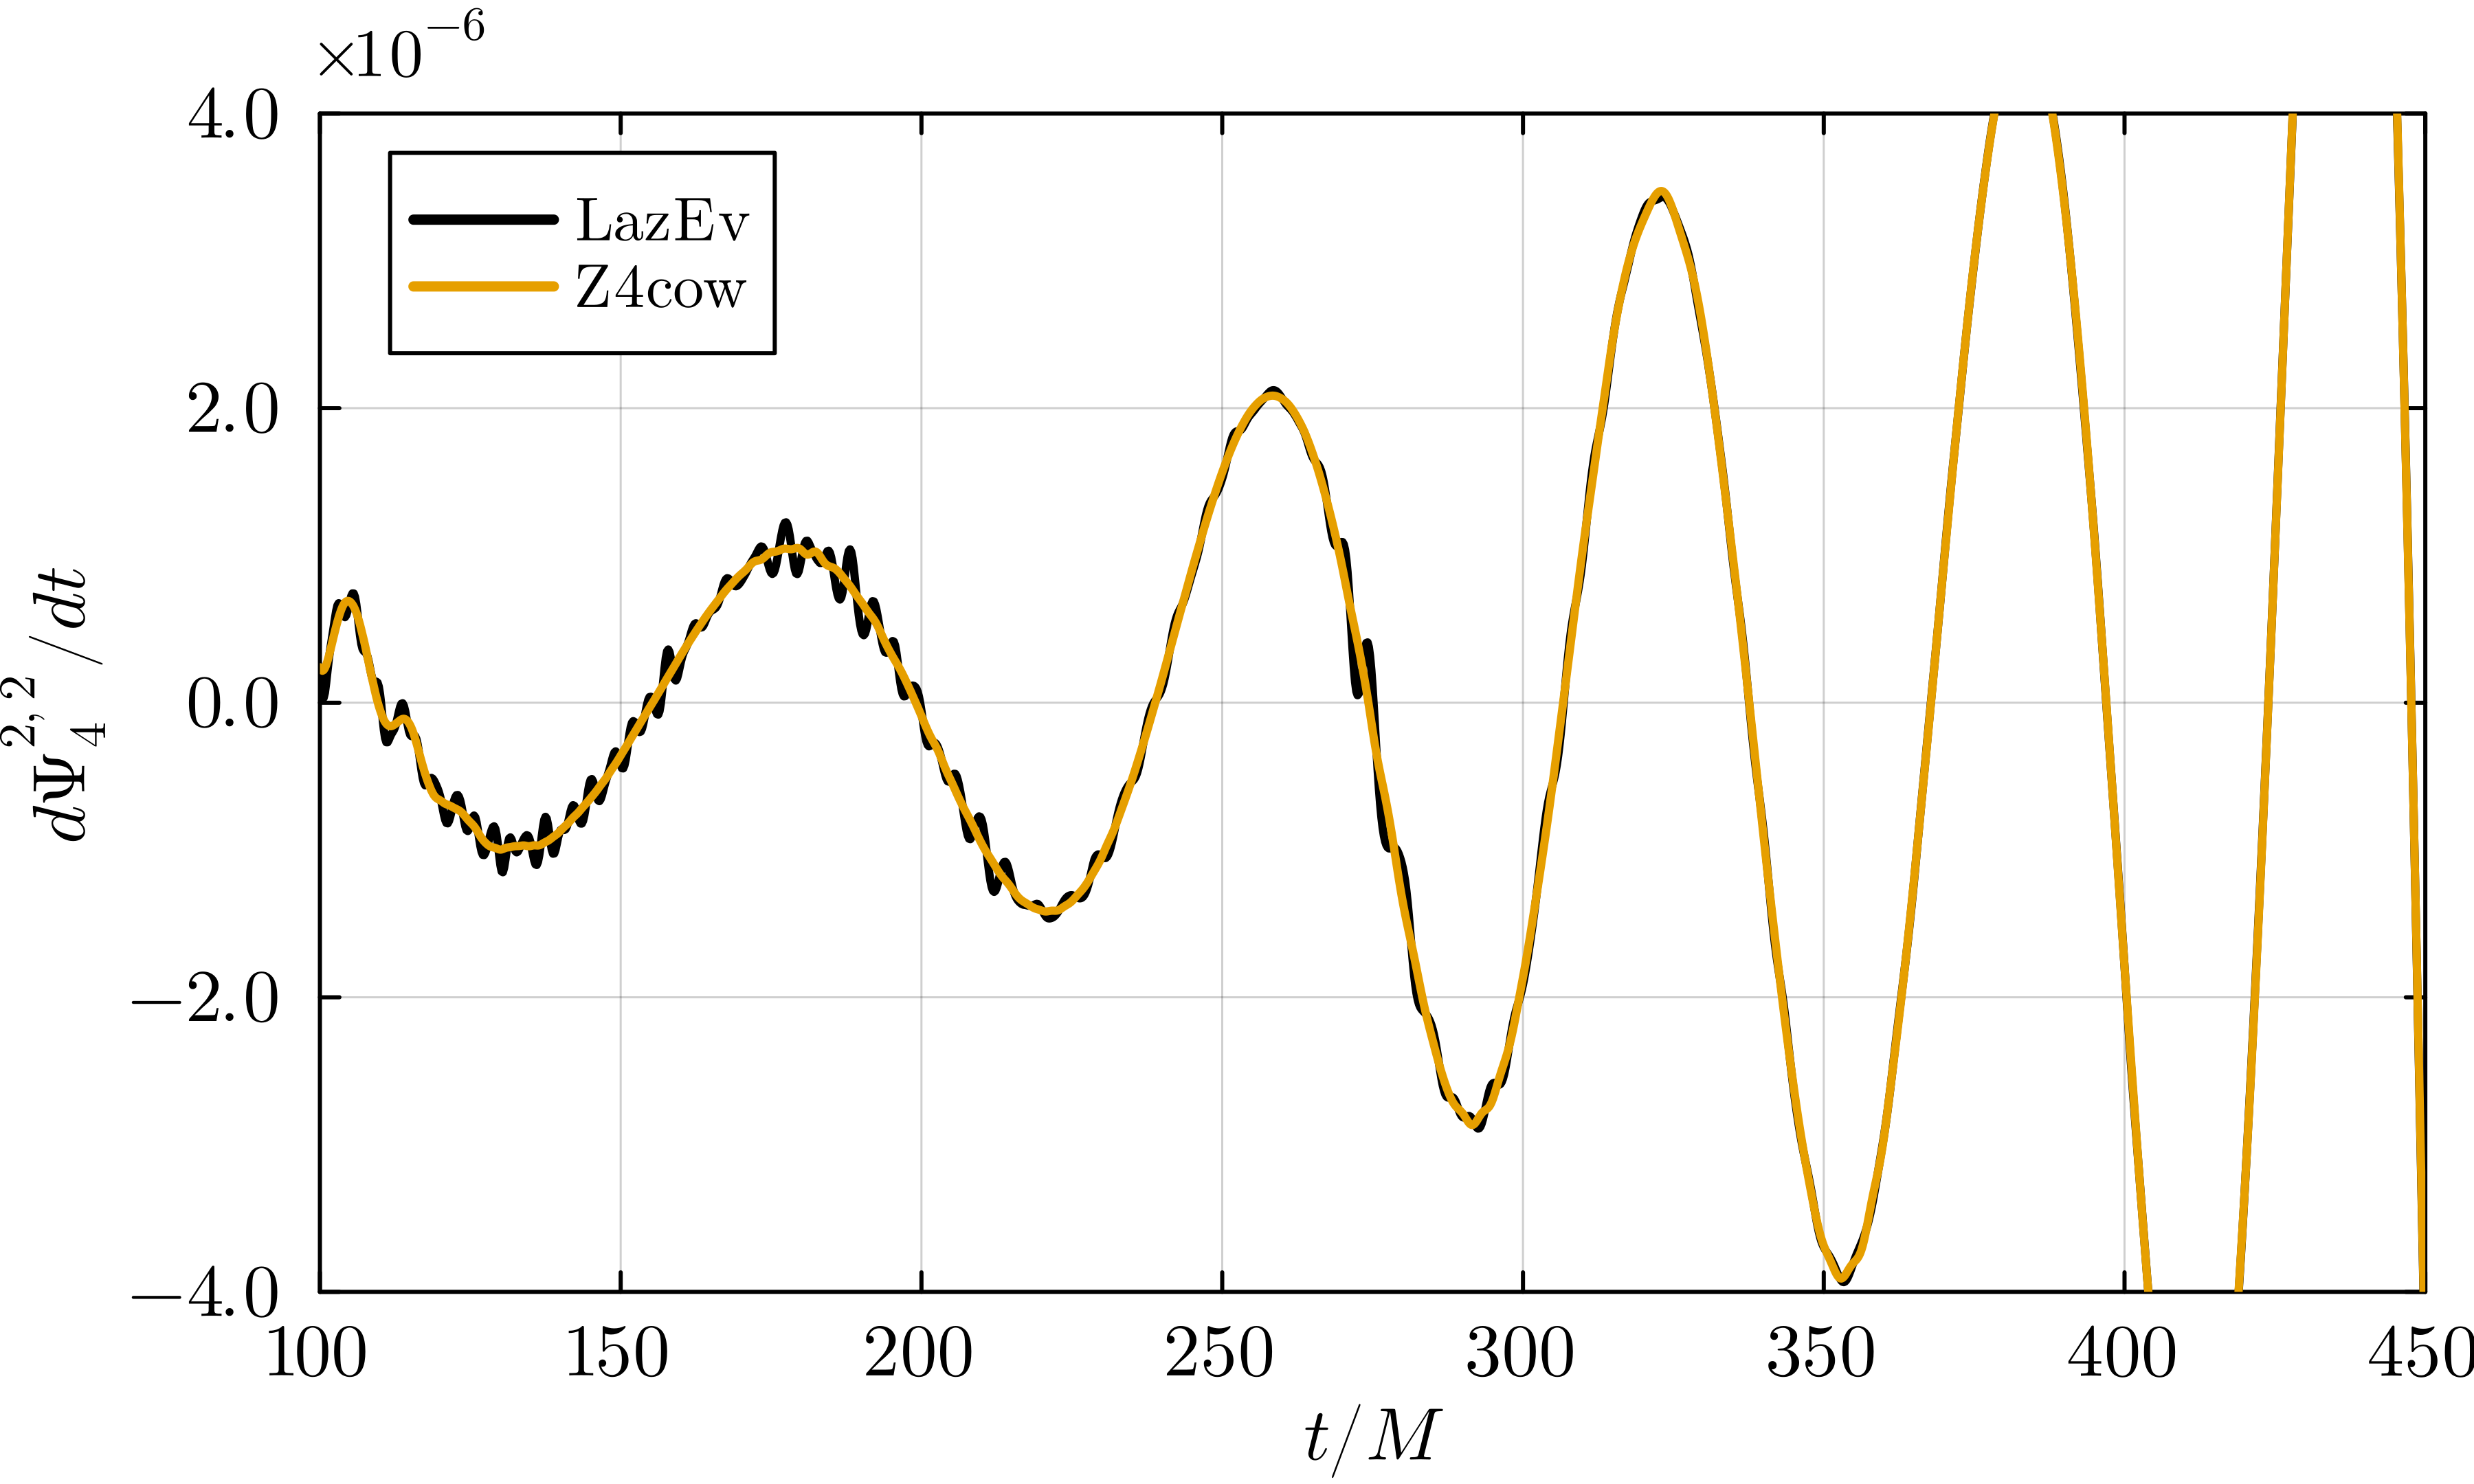

In [3]:
function interp_f_df(dat; n=1)
    x = dat[1]
    y = dat[2]
    f = linear_interpolation(x, y)
    df = linear_interpolation(x, MiscTool.derivs(x, y; n=n))
    return f, df
end
#
let dirsZ, dirsL, fZ, fL, dfZ, dfL
    plt_dtreal = plot()
    xs = 100:50:450
    xticks!(plt_dtreal, xs, [L"%$(n)" for n in xs])
    dirsL = [("LazEv-low/pk_rad_obs_1_psi4_2_2.tl", "LazEv")]
    dirsZ = [("q1-Z4cow-newInitLap-low/Sum/mp_Psi4_l2_m2_r60.00.tsv", "Z4cow")]
    (datsL, labsL) = MiscTSV.load_data_0d(dirsL; cols=[1, 2, 3], parent_dir="../../data/q1")
    (datsZ, labsZ) = MiscTSV.load_data_0d(dirsZ; cols=[1, 2, 3], parent_dir="../../data/q1")
    # resample datsL, make it has similar num of data points as Z4cow
    datsL = [[d[1:10:27611] for d in dat] for dat in datsL]
    println(length(datsL[1][1]))
    println(length(datsZ[1][1]))
    # Interpolate
    fL, dfL = interp_f_df(datsL[1])
    fZ, dfZ = interp_f_df(datsZ[1])
    # Plot
    x0 = datsZ[1][1]
    plot!(plt_dtreal, x0, -dfL(x0), label=L"\mathrm{LazEv}", linewidth=2)
    plot!(plt_dtreal, x0, dfZ(x0), label=L"\mathrm{Z4cow}", linewidth=2)
    plot!(xlabel=L"t/M", ylabel=L"d\Psi_4^{2,2}/dt", framestyle=:box,
          titlefontsize=14,
          guidefontsize=12,
          tickfontsize=12,
          legendfontsize=10)
    plot!(plt_dtreal, xlim=(100, 450), ylim=(-4e-6,4e-6), size=(600,360), dpi=600)
    plot!(yaxis=(formatter=(f)->L"%$(round(f * 1e6, digits=1))"), topmargin=0.5cm)
    annotate!(100, 4e-6*1.12, Plots.text(L"\times10^{-6}", 11, :black, :left))
    # savefig(plt_dtreal, "GW-derivs.pdf")
    display(plt_dtreal)
end